In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv("homes.csv") 
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [5]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


Index(['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres',
       'Taxes'],
      dtype='object')

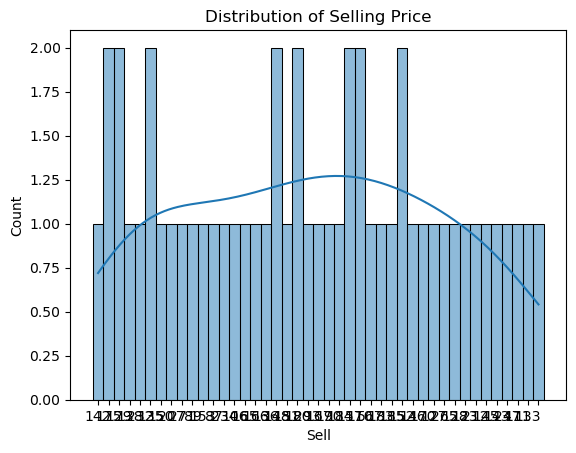

In [9]:
# Distribution of Selling Price
sns.histplot(df['Sell'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

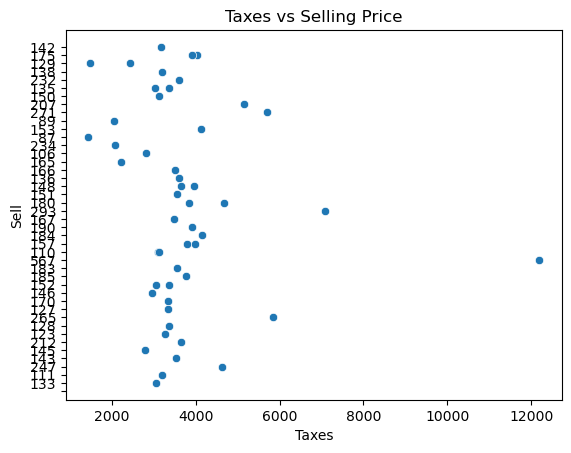

In [13]:
# Scatter plot: Taxes vs Selling Price
sns.scatterplot(x='Taxes', y='Sell', data=df)
plt.title('Taxes vs Selling Price')
plt.show()

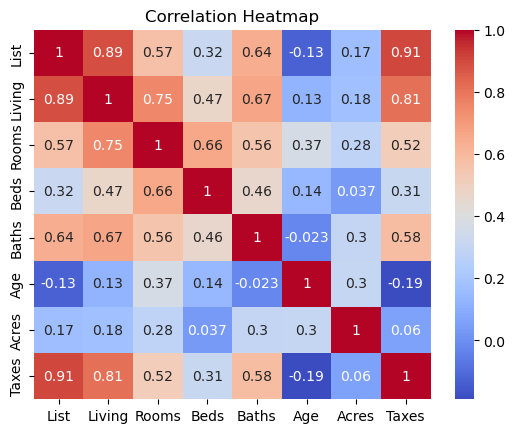

In [17]:
# Correlation Heatmap (numeric columns only)
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
import statsmodels.api as sm

# Prepare data (drop missing and convert if needed)
df = df.dropna(subset=['Taxes', 'Sell'])
df['Sell'] = pd.to_numeric(df['Sell'], errors='coerce')

# Define variables
X = df[['Taxes']]
y = df['Sell']

# Add constant term (for intercept)
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        12:01:42   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

I fitted a simple linear regression using Taxes as the independent variable and Selling Price (Sell) as the dependent variable.
The output table shows the intercept, the coefficient for Taxes, and model statistics such as R² and p-values.
A positive coefficient means that higher taxes are generally associated with higher selling prices (possibly because more expensive homes have higher property taxes).

R² shows how much of the variation in selling price is explained by taxes.

p-value < 0.05 means the relationship is statistically significant.

If the R² is low, taxes alone don’t fully predict price, but they may still correlate positively.

In [29]:
X2 = df[['Living']]  # or 'Beds', 'Rooms', etc.
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           4.39e-17
Time:                        12:02:23   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

I repeated the analysis using Living area as the independent variable.
By comparing R² values, we can see which model explains more of the variation in selling price.

If Living → Sell has a higher R² than Taxes → Sell, it’s a stronger single predictor.

The p-value again indicates whether the slope is significant.

Typically, variables such as square footage (Living) correlate more strongly with selling price than property taxes.

Conclusion 
The Taxes to Sell model has an R² of 0.809, while Living to Sell has 0.773.
Taxes explains slightly more variation in selling price, so it’s the stronger single predictor, though both relationships are statistically significant (p < 0.05).

Taxes likely performs better because property taxes reflect overall home value, while Living area directly affects price but not as strongly here.

Limitations: 
Each model uses only one variable and assumes a linear relationship, ignoring other factors like rooms, age, or lot size. A multiple-regression model would give a more complete and accurate picture.